<a href="https://colab.research.google.com/github/K-Wolfe-hub/spds_Capstone_2/blob/main/Capstone_2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is designed to follow up the Capstone_2_Data_Wrangling notebook found at https://drive.google.com/file/d/1XFBrlShXEuFz9cl1wIn1xm5AwgOuOEuI/view?usp=sharing. The goal of this notebook is to assess the data harvested from HCAD and perform some simple corrolations to see if there are any aparent relationships.

In [1]:
#import needed modules 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
#import data file from Data Wrangling Step
real_data = pd.read_csv('gdrive/My Drive/Springboard Capstone 2/HCAD_Data/sfh_full_desc.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,7,10,11,38) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
real_data.head(1)

,Unnamed: 0,acct,state_class,school_dist,Neighborhood_Code,Neighborhood_Grp,Market_Area_1,Market_Area_2,econ_area,econ_bld_class,center_code,yr_impr,yr_annexed,dsc_cd,bld_ar,land_ar,acreage,Cap_acct,shared_cad,land_val,bld_val,x_features_val,assessed_val,tot_appr_val,tot_mkt_val,prior_land_val,prior_bld_val,prior_x_features_val,prior_ag_val,prior_tot_appr_val,prior_tot_mkt_val,new_construction_val,tot_rcn_val,value_status,protested,lgl_1,lgl_2,lgl_3,lgl_4,jurs,...,appeal_red_pct,,A/C,AC1,ATR,BC1,EL1,EL2,FL1,FL2,FL3,FPD,FPM,FPO,FPW,FXA,FXT,Fir,Fire,Fix,Fixt,INT,LLR,MAS,MS1,OD4,REL,RMB,RMF,RMH,RMR,RMT,Roo,Room,SC1,STC,STY,UFA,WH,WHT
0,363,11200000014,A1,1,5900.07,0,4001,4001,1,,33,1904,,S,3888,0,0.0,N,N,0.0,102415.0,0.0,102415.0,102415.0,102415.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,249793.0,Noticed,Y,TRS 1A-1 2B 3A 4B & 5 BLK 119 (IMPS ONLY),TR A (PORTION OF ABANDONED CHEVERT ST),(LAND*0011190000025),(PRORATED 4-27-20),001 040 041 042 043 044 048 061 265 919 920,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [5]:
real_data.shape

(1059015, 90)

In [6]:
#I am going to iterate through the columns creating countcharts to see which columns are worth investigating more. 
#I am starting with schooldist because acct is the index and state_class is A1 for all.
col = real_data.columns


In [7]:
print(col)

Index(['Unnamed: 0', 'acct', 'state_class', 'school_dist', 'Neighborhood_Code',
       'Neighborhood_Grp', 'Market_Area_1', 'Market_Area_2', 'econ_area',
       'econ_bld_class', 'center_code', 'yr_impr', 'yr_annexed', 'dsc_cd',
       'bld_ar', 'land_ar', 'acreage', 'Cap_acct', 'shared_cad', 'land_val',
       'bld_val', 'x_features_val', 'assessed_val', 'tot_appr_val',
       'tot_mkt_val', 'prior_land_val', 'prior_bld_val',
       'prior_x_features_val', 'prior_ag_val', 'prior_tot_appr_val',
       'prior_tot_mkt_val', 'new_construction_val', 'tot_rcn_val',
       'value_status', 'protested', 'lgl_1', 'lgl_2', 'lgl_3', 'lgl_4', 'jurs',
       'Real_Personal_Property', 'Hearing_Type', 'State_Class_Code',
       'Owner_Name', 'Agent_Code', 'Initial_Appraised_Value',
       'Initial_Market_Value', 'Final_Appraised_Value', 'Final_Market_Value',
       'appeal_reduction', 'appeal_red_pct', '    ', 'A/C ', 'AC1 ', 'ATR ',
       'BC1 ', 'EL1 ', 'EL2 ', 'FL1 ', 'FL2 ', 'FL3 ', 'FPD ', 'FPM

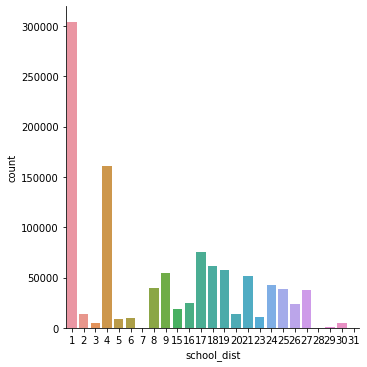

In [8]:
g = sns.catplot(data=real_data,kind='count',x='school_dist')
plt.show()


Although numeric, school_dist is a catagorical data column. Each number corrosponds to an ISD.

In [9]:
real_data['school_dist'].value_counts()

1     304305
4     160857
17     75213
18     61146
19     57504
9      55014
21     52028
24     43077
8      39416
25     38468
27     37948
16     25227
26     23653
15     18385
2      14183
20     13344
23     10538
6       9718
5       8535
30      4852
3       4454
29       669
7        386
31        87
28         8
Name: school_dist, dtype: int64

Looking at the counts, there are several school districs with > 20,000 single family homes (SFHs) mapped to them. there are 8 districts with less than 10,000 which may make them harder to use in predictive modeling.

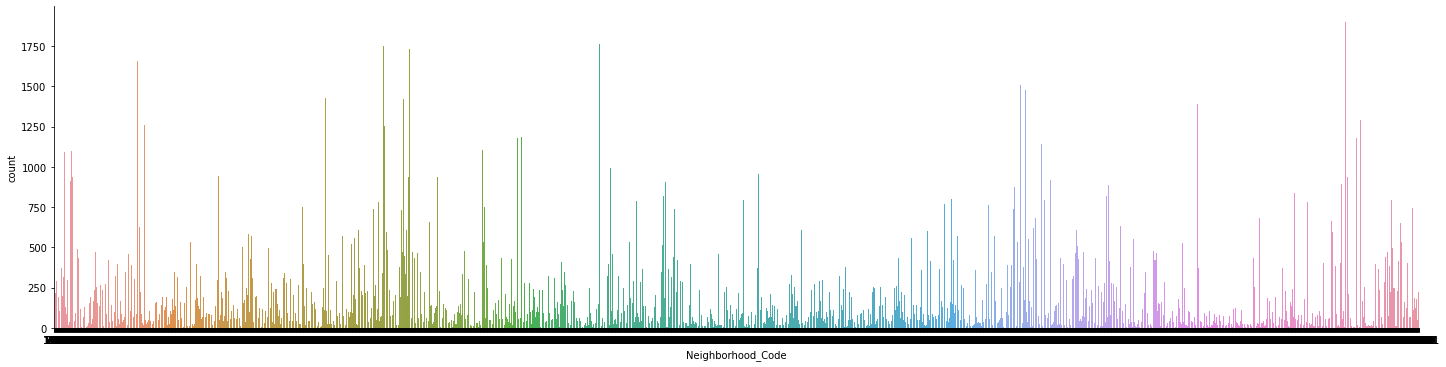

In [10]:
g = sns.catplot(data=real_data,kind='count',x='Neighborhood_Code',aspect=4)
plt.show()


In [11]:
len(real_data['Neighborhood_Code'].unique())

5900

There are 5900 unique Neighborhood_Code's represented in this dataset. If the SFH's were distributed equally there would only be 180 homes per Neighborhood. One note of caution with this column is that it contains numeric codes that will look like float values but are in fact catagorical.

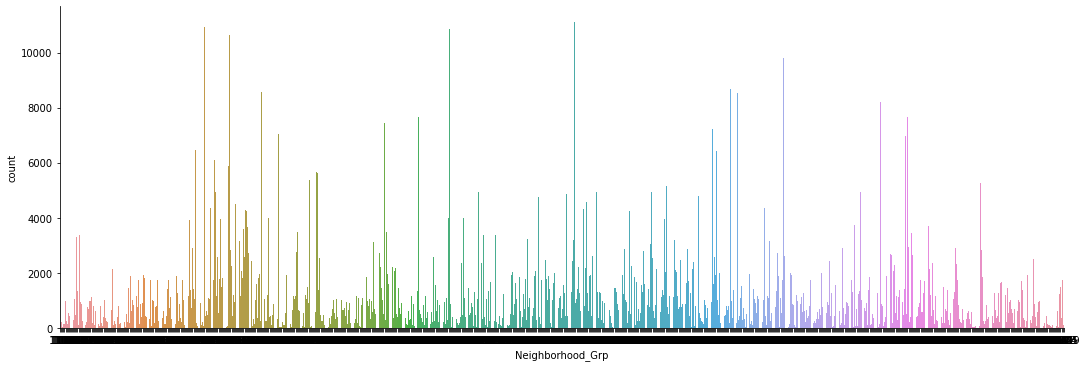

In [12]:
g = sns.catplot(data=real_data,kind='count',x='Neighborhood_Grp',aspect=3)
plt.show()


In [13]:
len(real_data['Neighborhood_Grp'].unique())

926

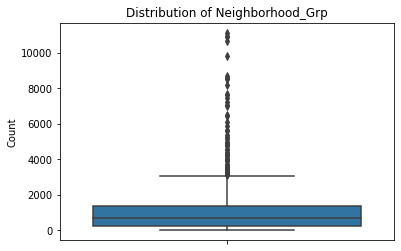

In [14]:
N_Grp_Counts = real_data['Neighborhood_Grp'].value_counts()
g= sns.boxplot(y=N_Grp_Counts.values)
g = plt.title('Distribution of Neighborhood_Grp')
g = plt.ylabel('Count')
plt.show()

Like with Neighborhood_Code this column is a numeric value that represents a catigorical value. With a lower number of Neighborhood_Grp these should bracket together larger numbers of homes but >75% of the Neighborhoo_Grp's contain less than 1800 SFH's.

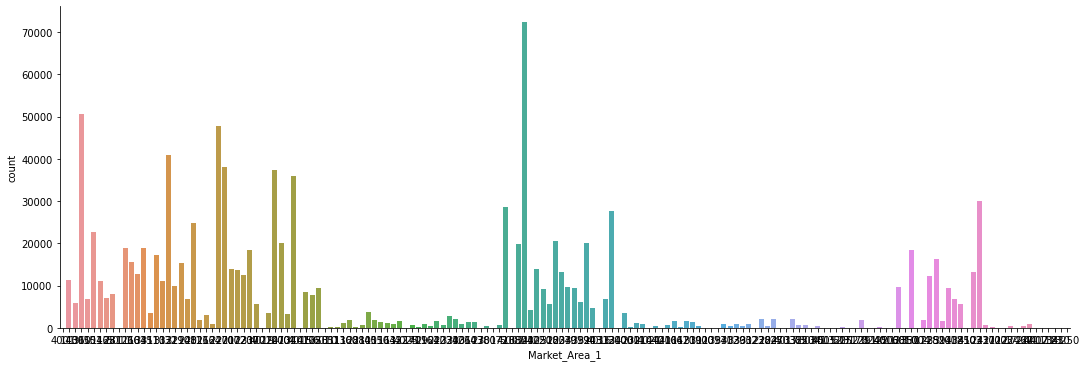

In [15]:
g = sns.catplot(data=real_data,kind='count',x='Market_Area_1',aspect=3)
plt.show()


Market_Area_1 looks to be a catigorical data column with numbers as the values as well. There are less columns in this than Neighborhood_Code, which may mean that Market_Area_1 agrigates Neighborhood_Code's. This may not be a direct relationship though.

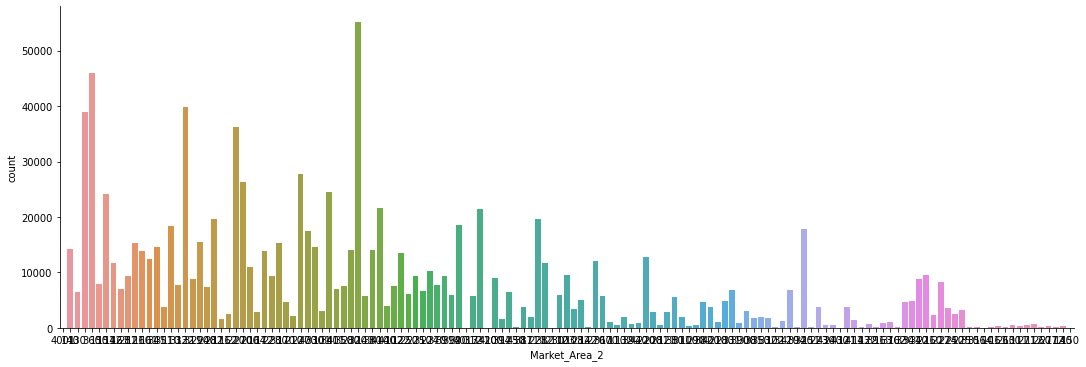

In [16]:
g = sns.catplot(data=real_data,kind='count',x='Market_Area_2',aspect=3)
plt.show()


In [17]:
#are market area 1 and market area 2 the same? It looks like they are, but 2/3 of the SFH's have different values for these columns.
two_markets = real_data[real_data['Market_Area_1']!=real_data['Market_Area_2']]
two_markets.shape

(830610, 90)

Market_Area_2 looked like it may be the same as Market_Area_1, but by looking at the shape of a dataframe where the two are not equal I could determine that Market_Area_2 does in fact contain unique data. Like with the other columns like this the numbers are representing catigorical data not contineuous data.

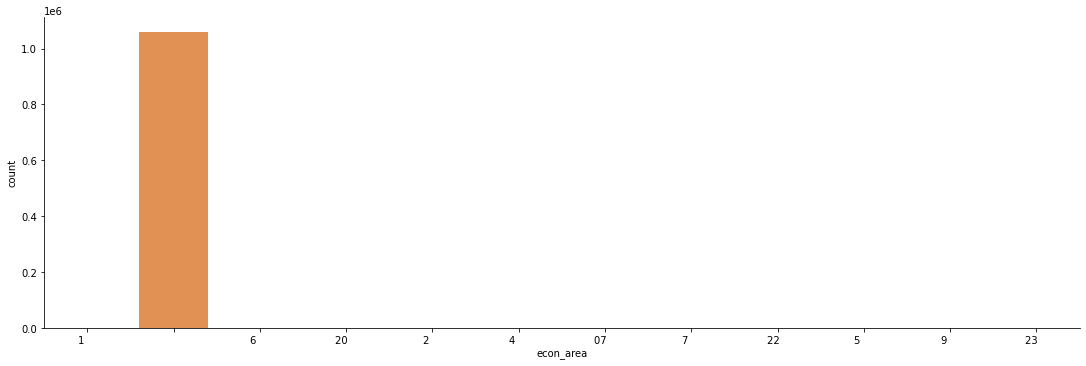

In [18]:
g = sns.catplot(data=real_data,kind='count',x='econ_area',aspect=3)
plt.show()


In [19]:
real_data['econ_area'].value_counts()

         1059002
4              2
2              2
07             1
23             1
6              1
1              1
5              1
22             1
9              1
20             1
7              1
Name: econ_area, dtype: int64

It looks like econ_area only has distinct values for 15 properties. I will remove prior to modeling.

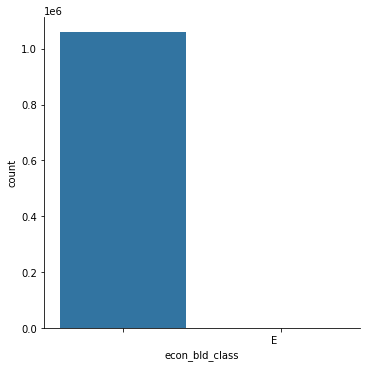

In [20]:
g = sns.catplot(data=real_data,kind='count',x='econ_bld_class')
plt.show()


In [21]:
real_data['econ_bld_class'].value_counts()

         1059001
E             14
Name: econ_bld_class, dtype: int64

econ_bld_class does not contain data for all but 14 properties and will be removed.

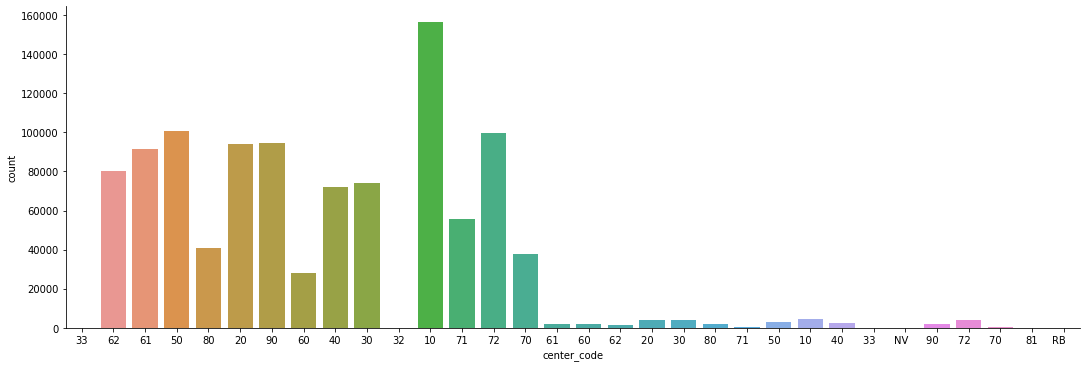

In [22]:
g = sns.catplot(data=real_data,kind='count',x='center_code',aspect=3)
plt.show()


center_code has good variability, most of the center_code's contain >30,000 SFHs and should be good modeling. 

In [23]:
yr_order = real_data['yr_impr'].unique()
yr = []
for i in range(len(yr_order)):
  yr.append(str(yr_order[i]))
yr.sort()
yr[0:5]

[' ', '1100', '1830', '1840', '1843']

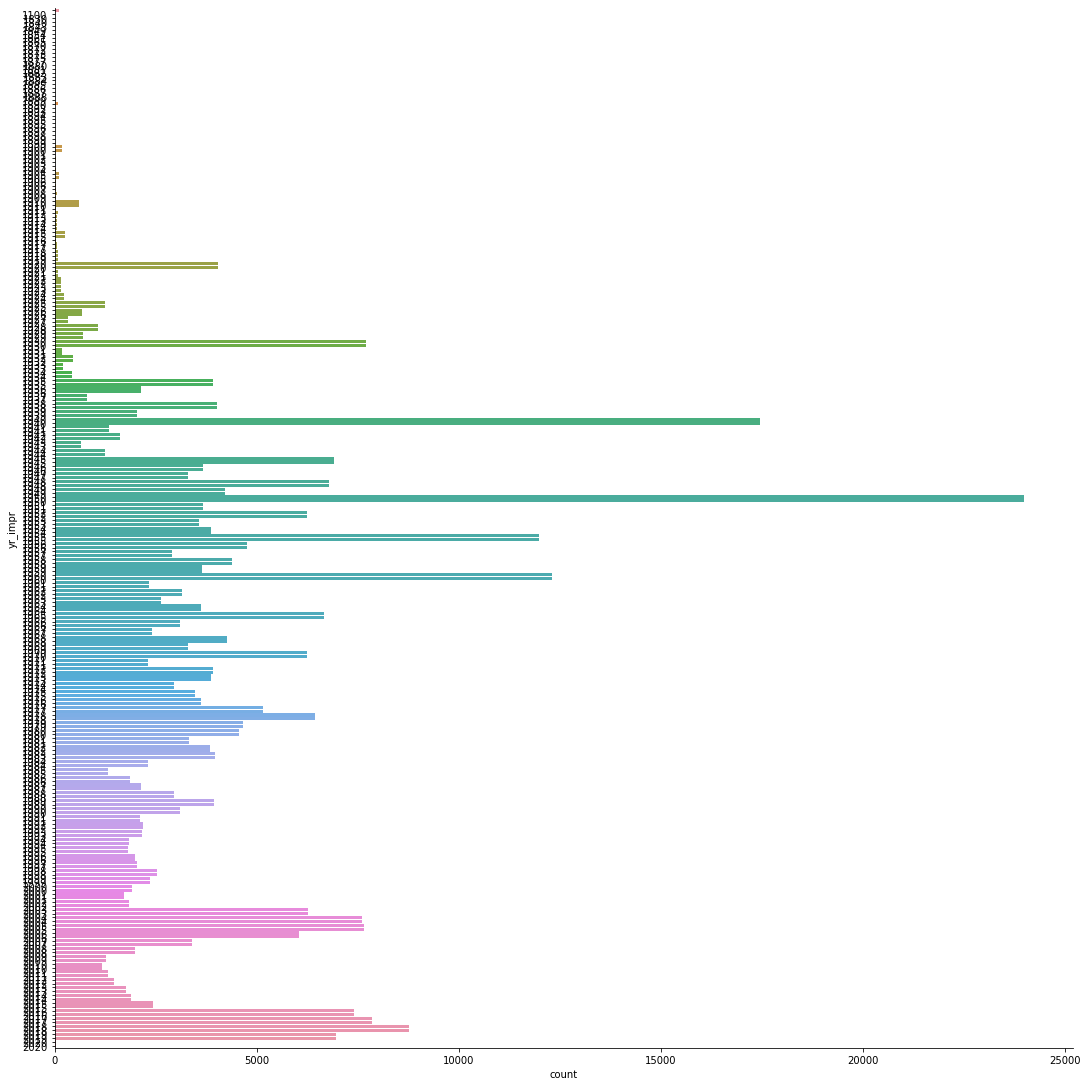

In [24]:
g = sns.catplot(data=real_data,kind='count',y='yr_impr',height=15,order=yr)
plt.show()


yr_impr is the year the improvemnt was constructed. There is sufficient spread in this data where it should be good for modeling and also may make sense for this to impact property value. 

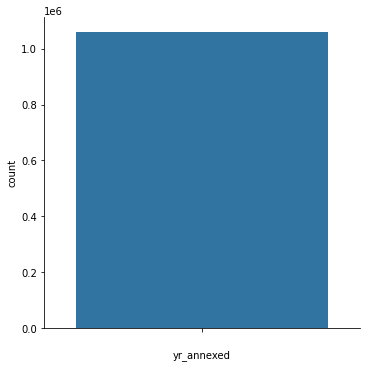

In [25]:
g = sns.catplot(data=real_data,kind='count',x='yr_annexed')
plt.show()


In [26]:
real_data['yr_annexed'].value_counts()

     1059015
Name: yr_annexed, dtype: int64

yr_annexed is entirely a single value and therefore will be removed from further analysis

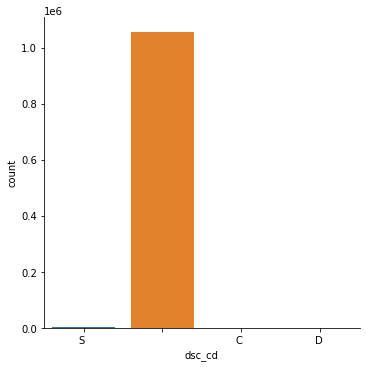

In [27]:
g = sns.catplot(data=real_data,kind='count',x='dsc_cd')
plt.show()


In [28]:
real_data['dsc_cd'].value_counts()

      1054666
S        4100
C         247
D           2
Name: dsc_cd, dtype: int64

dsc_cd has no value for most of the dataset. Therefore this column can be dropped.

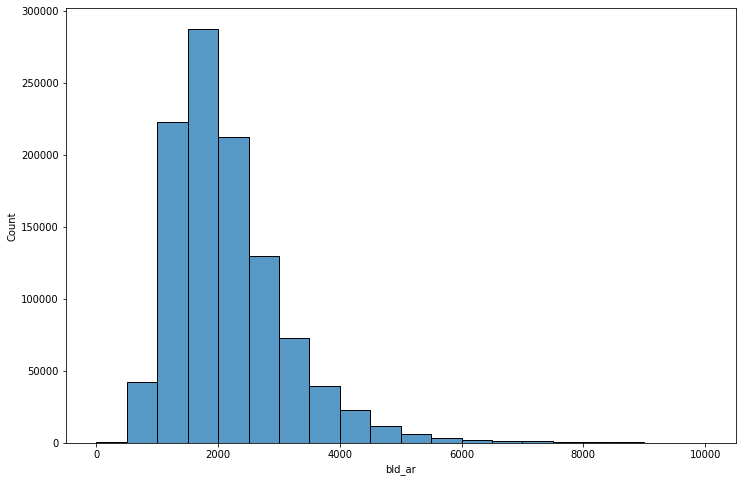

In [29]:
#moving into continuous so switching from catplot to relplot
f, ax = plt.subplots(figsize=(12, 8))
bin = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500,9000,9500,10000]
g = sns.histplot(data=real_data,x='bld_ar',bins=bin)
plt.show()


bld_ar seems to be a nice continueous variable that has a long tail to the right in the above plot due to very large homes being less common.

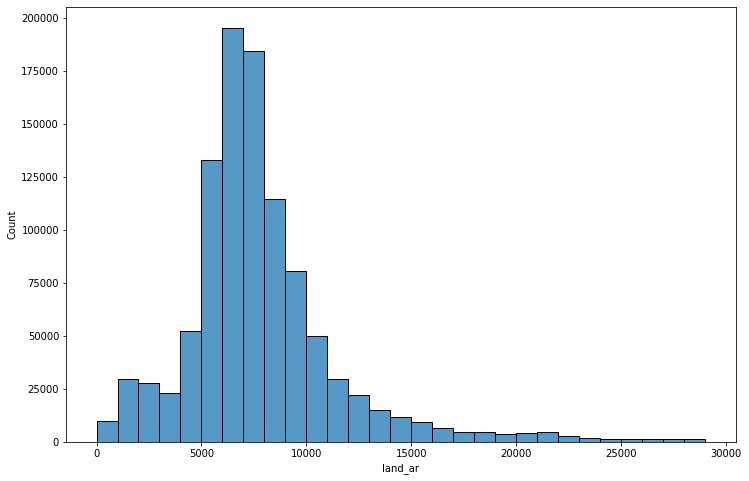

In [30]:
f, ax = plt.subplots(figsize=(12, 8))
lbin=[]
for num in range(30):
  lbin.append(num*1000)
g = sns.histplot(data=real_data,x='land_ar',bins=lbin)
plt.show()

land_ar seems to be a nice continueous variable that has a long tail to the right in the above plot due to very large properties being less common.

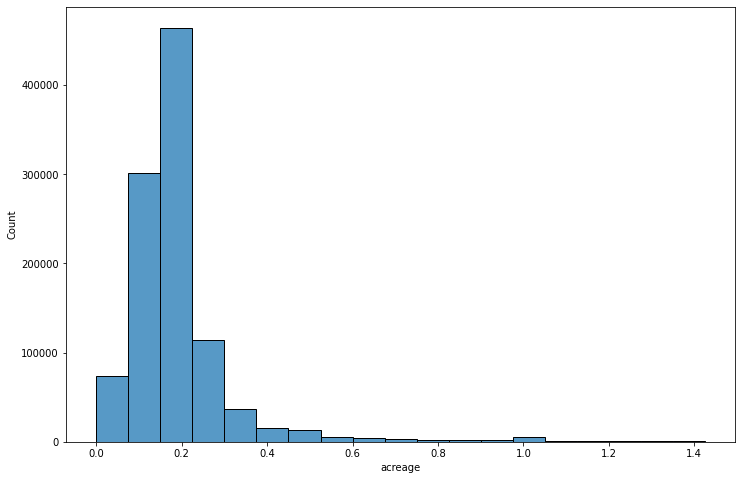

In [31]:
f, ax = plt.subplots(figsize=(12, 8))
abin=[]
for num in range(20):
  abin.append(num*0.075)
g = sns.histplot(data=real_data,x='acreage',bins=abin)
plt.show()


In [32]:
real_data['land_ar'].corr(real_data['acreage'])

0.9999999999997035

It looks like land_ar and acreage are the esentially the same data (this is not a shock since one should be able to calculate the acreage from the properties square footage... which is what land_ar was). I should make sure only one of these is used in modeling, so I will remove acreage in the dataset that will be moved on to modeling.

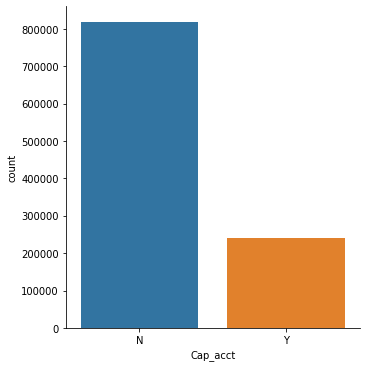

In [33]:
g = sns.catplot(data=real_data,x='Cap_acct',kind='count')
plt.show()


Cap_acct is a catagorical column indicating if the account has a capped flag applied to it. 

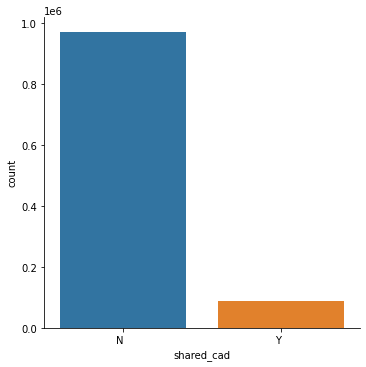

In [34]:
g = sns.catplot(data=real_data,x='shared_cad',kind='count')
plt.show()

shared_cad is a column that flags if the property shares its property discription with another property. I'm not sure how this would impact worth, but because there are a good number of properties with this flag I will keep this column in for modeling.

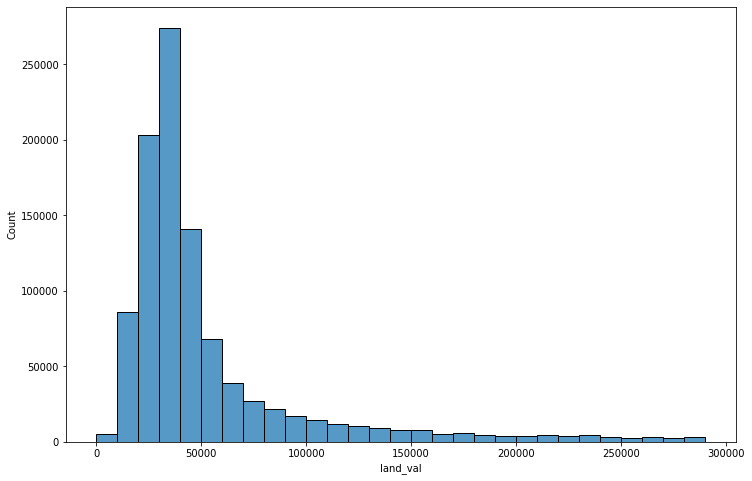

In [35]:
f, ax = plt.subplots(figsize=(12, 8))
lvbin=[]
for num in range(30):
  lvbin.append(num*10000)
g = sns.histplot(data=real_data,x='land_val',bins=lvbin)
plt.show()

land_val has a long tail to the right but is otherwise a good continuous variable that is likely to be useful in modeling.

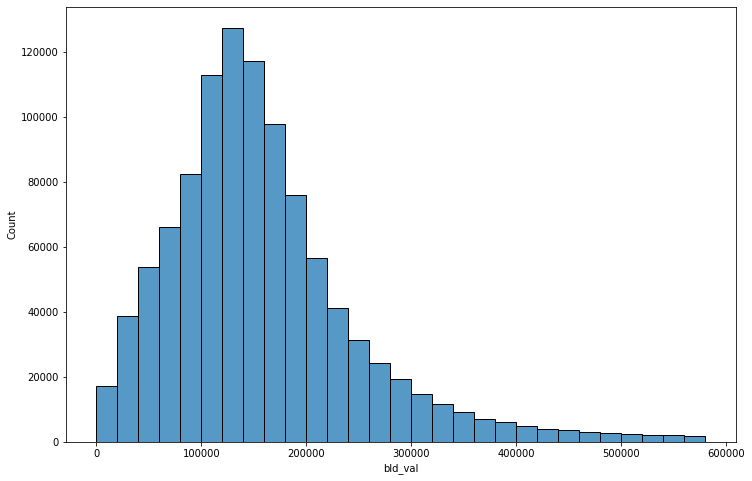

In [36]:
f, ax = plt.subplots(figsize=(12, 8))
bvbin=[]
for num in range(30):
  bvbin.append(num*20000)
g = sns.histplot(data=real_data,x='bld_val',bins=bvbin)
plt.show()

bld_val also has a long tail to the right but is otherwise a good continuous variable that is likely to be useful in modeling.

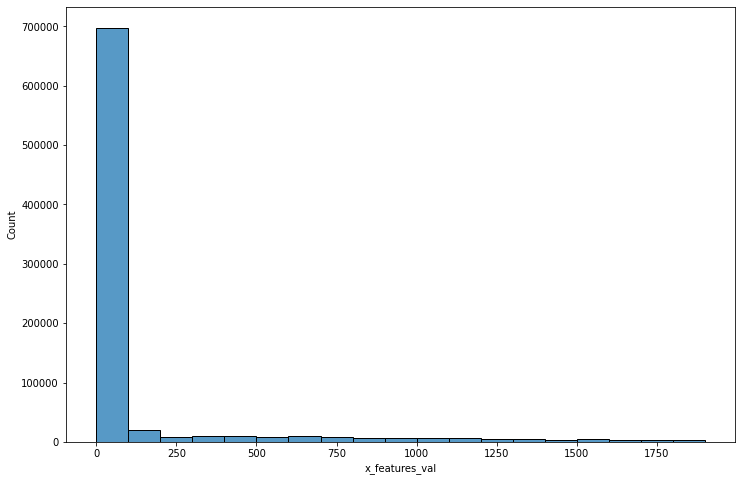

In [37]:
f, ax = plt.subplots(figsize=(12, 8))
xfvbin=[]
for num in range(20):
  xfvbin.append(num*100)
g = sns.histplot(data=real_data,x='x_features_val',bins=xfvbin)
plt.show()

In [38]:
print(np.max(real_data['x_features_val']))

590612.0


Most properties have very low x_feaures_val, but there are some with very high values (the max is nearly $600,000) that would not model without it's inclusion.

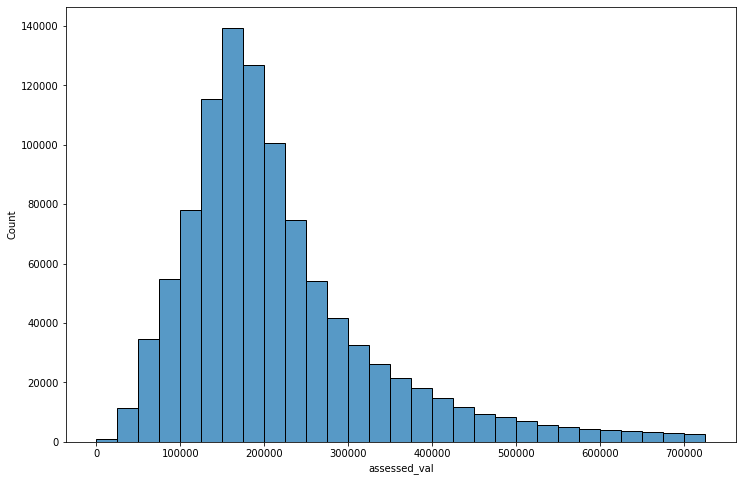

In [39]:
f, ax = plt.subplots(figsize=(12, 8))
avbin=[]
for num in range(30):
  avbin.append(num*25000)
g = sns.histplot(data=real_data,x='assessed_val',bins=avbin)
plt.show()

assessed_val is the total assessed value (land_val + building_val +x_features_val). This is likely very similar to the tot_mkt_val.

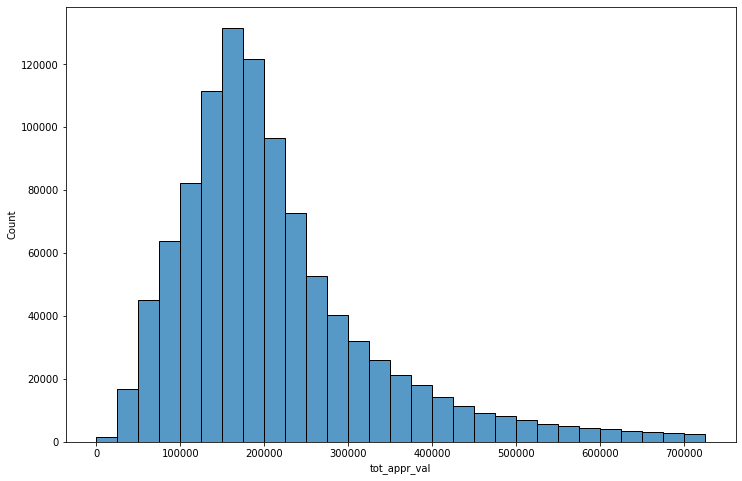

In [40]:
f, ax = plt.subplots(figsize=(12, 8))
tavbin=[]
for num in range(30):
  tavbin.append(num*25000)
g = sns.histplot(data=real_data,x='tot_appr_val',bins=tavbin)
plt.show()

tot_appr_val is the total appraised value. This is likely very similar to the tot_mkt_val. Overall this looks like a good continueous column.

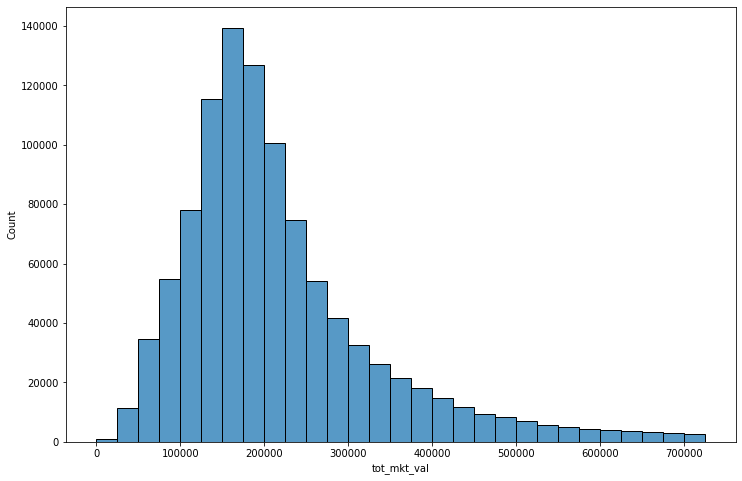

In [41]:
f, ax = plt.subplots(figsize=(12, 8))
tmvbin=[]
for num in range(30):
  tmvbin.append(num*25000)
g = sns.histplot(data=real_data,x='tot_mkt_val',bins=tmvbin)
plt.show()

tot_mkt_val is the total market value. This is likely very similar to the tot_appr_val. Overall this looks like a good continueous column.

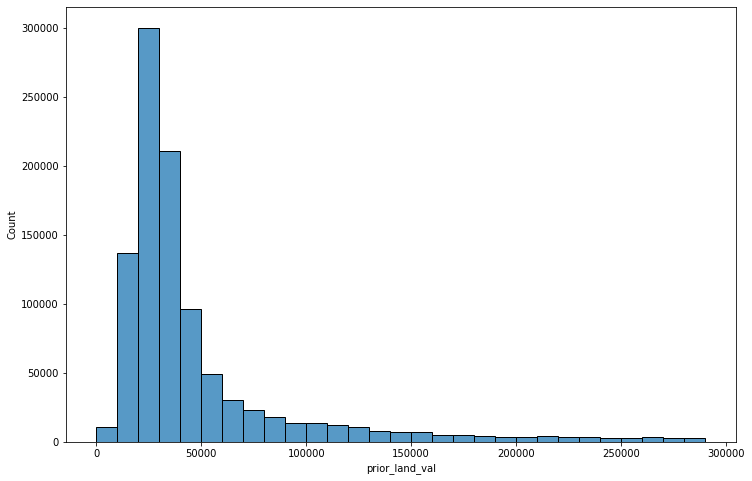

In [42]:
f, ax = plt.subplots(figsize=(12, 8))
plvbin=[]
for num in range(30):
  plvbin.append(num*10000)
g = sns.histplot(data=real_data,x='prior_land_val',bins=plvbin)
plt.show()

prior_land_val is the land value from the prior year's assessment. This column being significantly below the land_val for this year may encourage a protest.

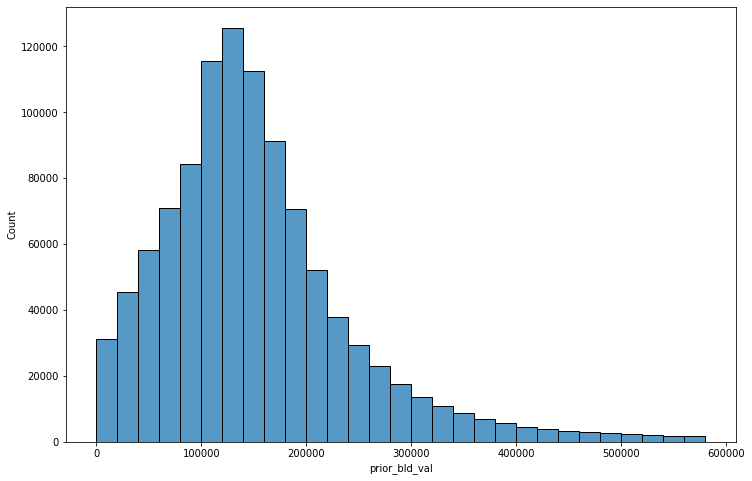

In [43]:
f, ax = plt.subplots(figsize=(12, 8))
pbvbin=[]
for num in range(30):
  pbvbin.append(num*20000)
g = sns.histplot(data=real_data,x='prior_bld_val',bins=pbvbin)
plt.show()

prior_bld_val is the building value from the prior year's assessment. This column being significantly below the bld_val for this year may encourage a protest.

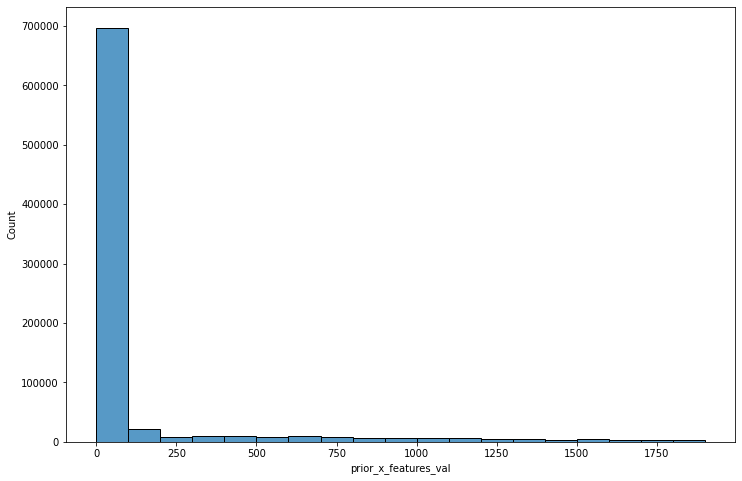

In [44]:
f, ax = plt.subplots(figsize=(12, 8))
pxvbin=[]
for num in range(20):
  pxvbin.append(num*100)
g = sns.histplot(data=real_data,x='prior_x_features_val',bins=pxvbin)
plt.show()

prior_x_features_val is the extra features value from the prior year's assessment. This column being significantly below the x_features_val for this year may encourage a protest.

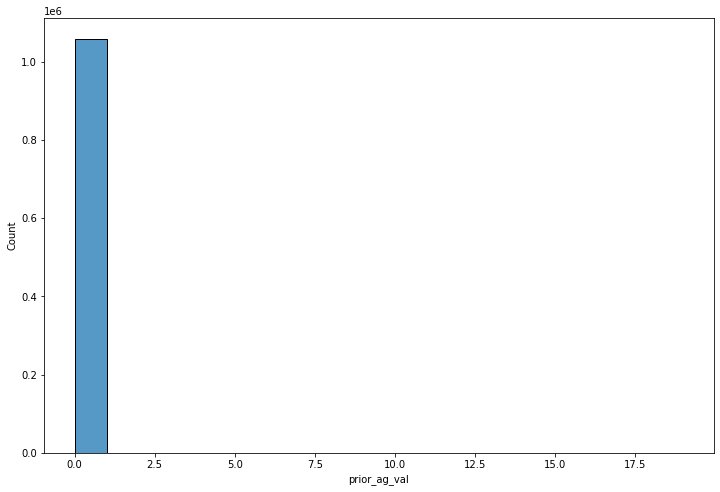

In [45]:
f, ax = plt.subplots(figsize=(12, 8))
pagvbin=[]
for num in range(20):
  pagvbin.append(num*1)
g = sns.histplot(data=real_data,x='prior_ag_val',bins=pagvbin)
plt.show()

In [46]:
real_data['prior_ag_val'].value_counts()

0.0        1059011
467.0            1
262.0            1
3180.0           1
23056.0          1
Name: prior_ag_val, dtype: int64

Only 4 non-zero entries. This should not be included in modeling.

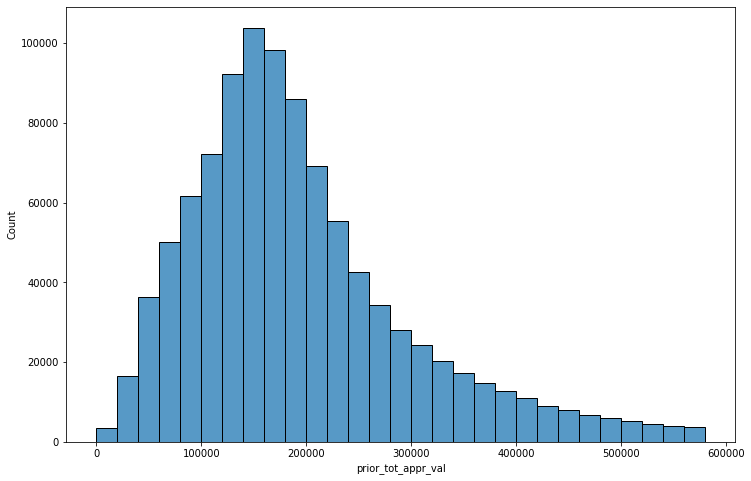

In [47]:
f, ax = plt.subplots(figsize=(12, 8))
ptavbin=[]
for num in range(30):
  ptavbin.append(num*20000)
g = sns.histplot(data=real_data,x='prior_tot_appr_val',bins=ptavbin)
plt.show()

prior_tot_appr_val is the total appraisal value from the prior year's assessment. This column being significantly below the tot_appr_val for this year may encourage a protest.

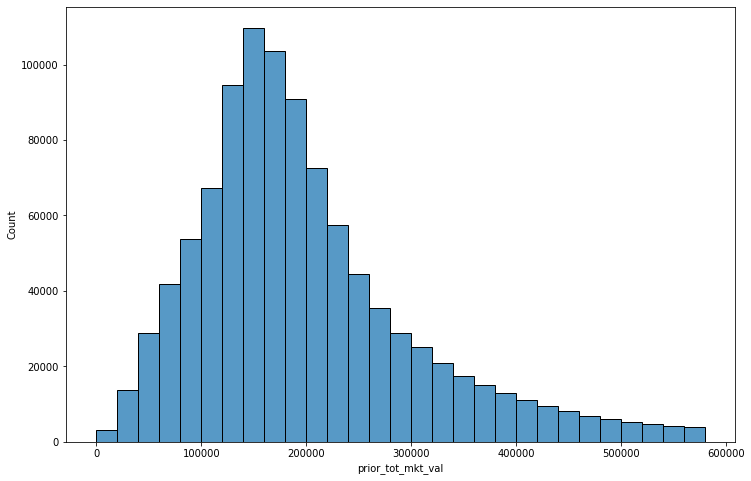

In [48]:
f, ax = plt.subplots(figsize=(12, 8))
ptmvbin=[]
for num in range(30):
  ptmvbin.append(num*20000)
g = sns.histplot(data=real_data,x='prior_tot_mkt_val',bins=ptmvbin)
plt.show()

prior_tot_mkt_val is the total market value from the prior year's assessment. This column being significantly below the tot_mkt_val for this year may encourage a protest.

In [49]:
real_data['new_construction_val'].value_counts()

0.0         1031080
13500.0          50
16200.0          38
10800.0          37
14175.0          32
             ...   
30172.0           1
6607.0            1
482875.0          1
30186.0           1
131063.0          1
Name: new_construction_val, Length: 23429, dtype: int64

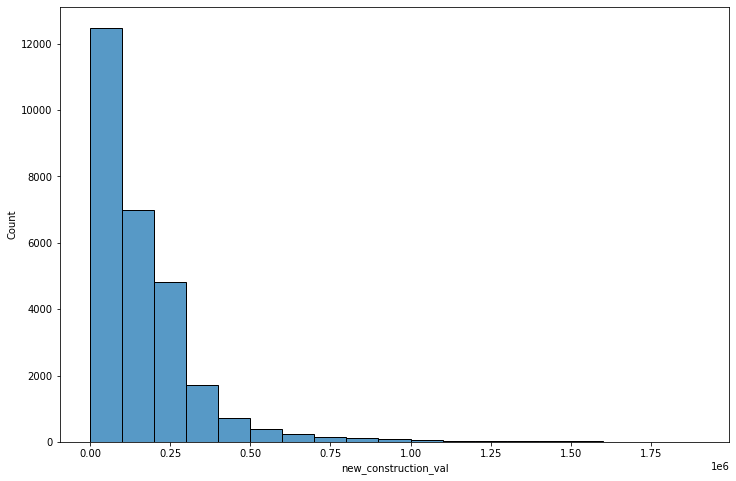

In [50]:
#most of the new_construction_val is 0, but might as well double check the non-zero data
f, ax = plt.subplots(figsize=(12, 8))
ncvbin=[]
for num in range(20):
  ncvbin.append(num*100000)
ncv_data=real_data[real_data['new_construction_val']!=0]
g = sns.histplot(data=ncv_data,x='new_construction_val',bins=ncvbin)
plt.show()

new_construction_val looks to have a good spread of data despite 95% of the data being zeros. 

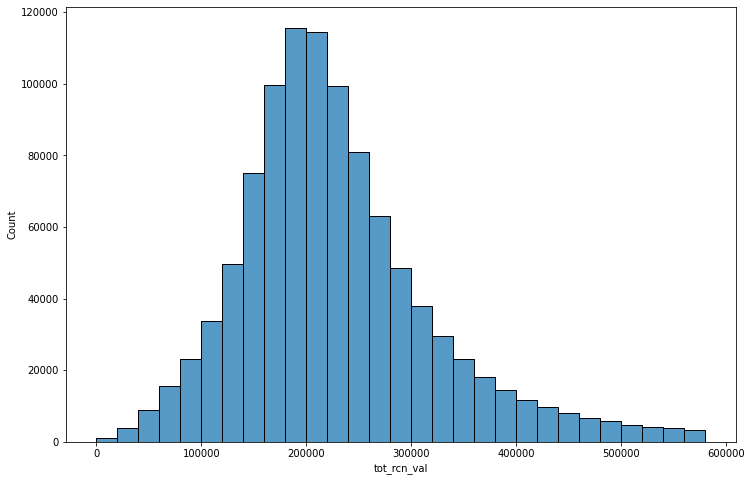

In [51]:
f, ax = plt.subplots(figsize=(12, 8))
trvbin=[]
for num in range(30):
  trvbin.append(num*20000)
g = sns.histplot(data=real_data,x='tot_rcn_val',bins=trvbin)
plt.show()

tot_rcn_val is the total value to replace the building on the property. 

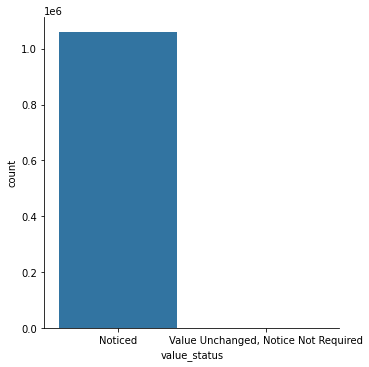

In [52]:
g = sns.catplot(data=real_data,x='value_status',kind='count')
plt.show()

In [53]:
#This looks like it is almost exclusively Noticed
real_data['value_status'].value_counts()

Noticed                                 1058989
Value Unchanged, Notice Not Required         26
Name: value_status, dtype: int64

With only 26 properties having a value other than noticed, this column does not provide useful information for modeling.

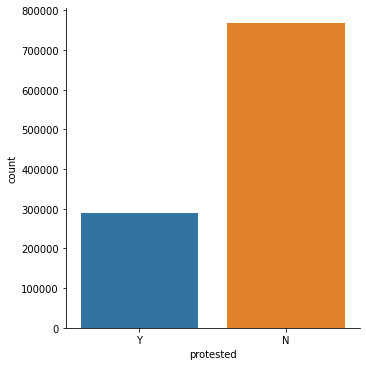

In [54]:
g = sns.catplot(data=real_data,x='protested',kind='count')
plt.show()

This is one of the main columns I would like to be able to predict. About 30% were protested.

lgl_1, lgl_2, lgl_3, lgl_4 are legal descriptions for the property and will not be useful for modeling.

In [55]:
#jurs is a catagorical column that appears to be interal coding for properties. Will not remove, but does not seem suitable for plotting/modeling.
real_data['jurs'].value_counts()

001 040 041 042 043 044 048 061                158413
001 040 041 042 043 044 048 061 949             26252
021 040 041 042 043 044 047 074                 23784
025 040 041 042 043 044 061 793                 18119
001 040 041 042 043 044 048 061 950             17520
                                                ...  
001 040 041 042 043 044 048 061 584 939 961         1
004 040 041 042 043 044 045 467 539 633             1
017 040 041 042 043 044 045 152 628 637 666         1
009 040 041 042 043 044 045 641 671 787             1
001 040 041 042 043 044 048 061 922                 1
Name: jurs, Length: 848, dtype: int64

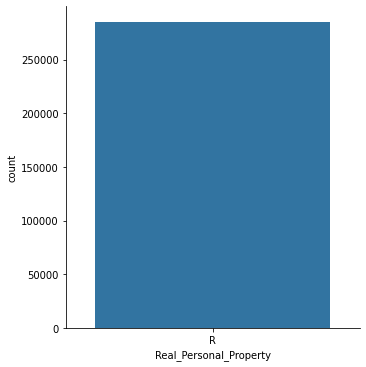

In [56]:
g = sns.catplot(data=real_data,x='Real_Personal_Property',kind='count')
plt.show()

In [57]:
#Real_Personal_Property is either R or NaN, all of the protests have a value of R... not a very useful column
real_data['Real_Personal_Property'].value_counts()

R    285383
Name: Real_Personal_Property, dtype: int64

This will be dropped since it does not have any useful data.

In [58]:
real_data['Hearing_Type'].fillna('N',inplace=True)

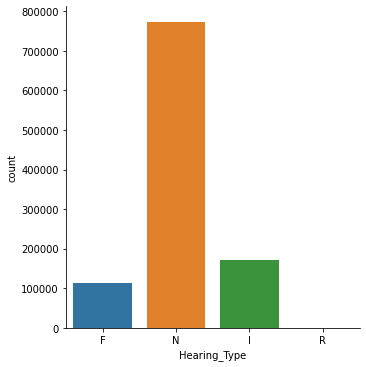

In [59]:
g = sns.catplot(data=real_data,x='Hearing_Type',kind='count')
plt.show()

There are 3 categories (Formal, Informal, Remote Formal) that were supplied plus all properties that did not have a Hearing have N.

In [60]:
real_data['Agent_Code'].fillna('NA',inplace=True)

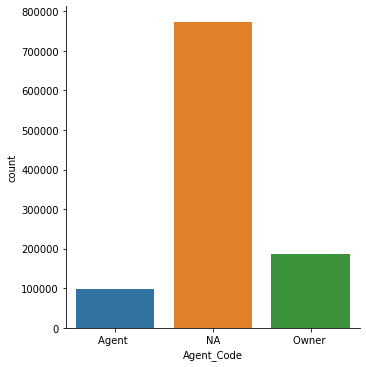

In [61]:
g = sns.catplot(data=real_data,x='Agent_Code',kind='count')
plt.show()

Agent_Code provides information on if the protest was managed by the Owner or if an 3rd party was utilized. The third value NA are the properties that were not protested.

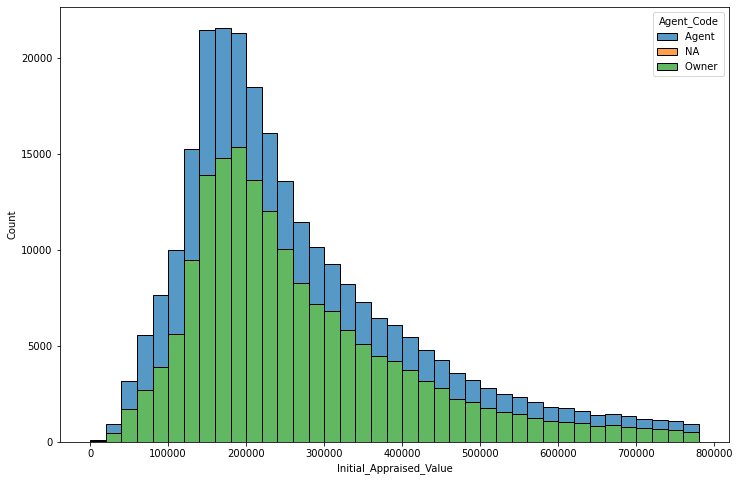

In [62]:
f, ax = plt.subplots(figsize=(12, 8))
iavbin=[]
for num in range(40):
  iavbin.append(num*20000)
g = sns.histplot(data=real_data,x='Initial_Appraised_Value',bins=iavbin,multiple="stack",hue='Agent_Code')
plt.show()

Initial_Appraised_Value is the value that was noticed. This may be more useful to compare to the the previous year's appraisal value. 

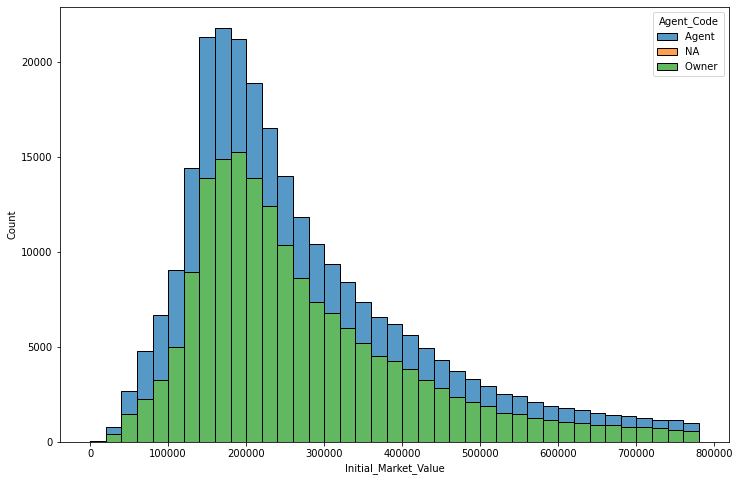

In [63]:
f, ax = plt.subplots(figsize=(12, 8))
imvbin=[]
for num in range(40):
  imvbin.append(num*20000)
g = sns.histplot(data=real_data,x='Initial_Market_Value',bins=imvbin,multiple="stack",hue='Agent_Code')
plt.show()

Initial_Market_Value is like Initial_Appraised_Value they look similar but not identical.

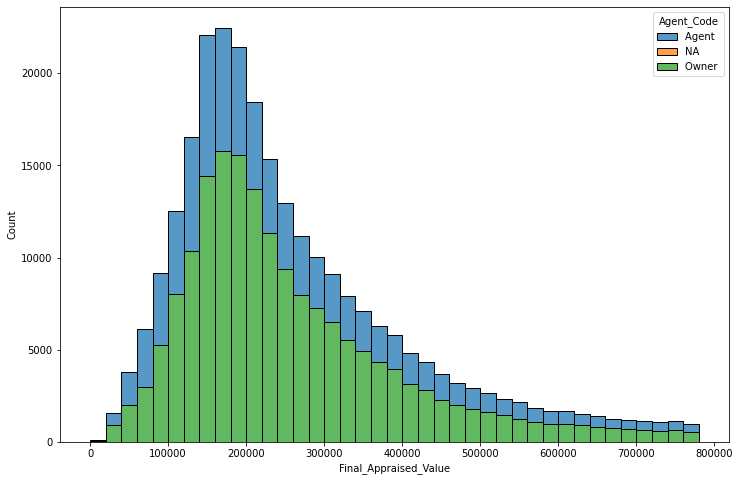

In [64]:
f, ax = plt.subplots(figsize=(12, 8))
favbin=[]
for num in range(40):
  favbin.append(num*20000)
g = sns.histplot(data=real_data,x='Final_Appraised_Value',bins=favbin,multiple="stack",hue='Agent_Code')
plt.show()

Final_Appraised_Value is the appraisal value after the hearings. This will be an important value to compare Agent/Owner performance.

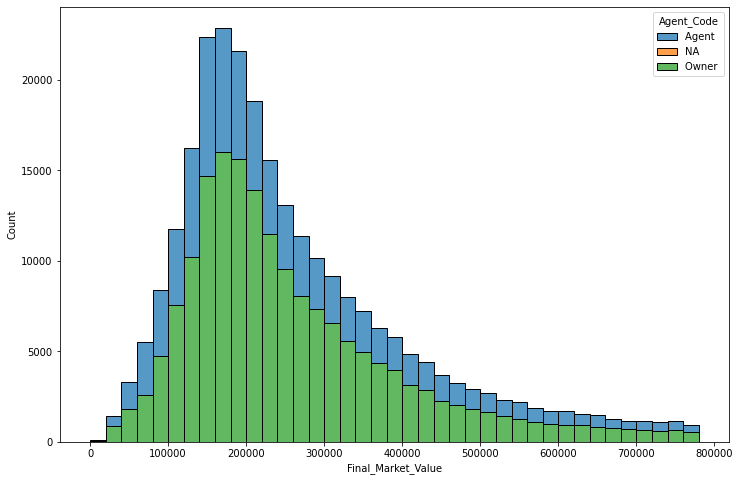

In [65]:
f, ax = plt.subplots(figsize=(12, 8))
fmvbin=[]
for num in range(40):
  fmvbin.append(num*20000)
g = sns.histplot(data=real_data,x='Final_Market_Value',bins=fmvbin,multiple="stack",hue='Agent_Code')
plt.show()

Final_Market_Value is the Market value after the hearings. This will be an important value to compare Agent/Owner performance.

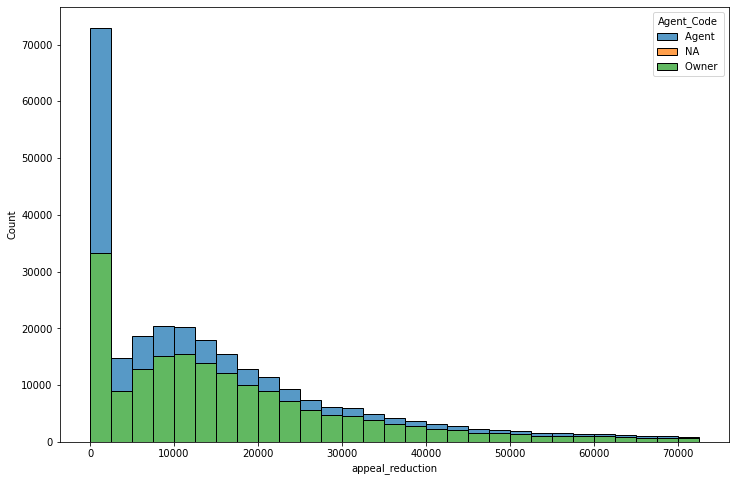

In [66]:
f, ax = plt.subplots(figsize=(12, 8))
arbin=[]
for num in range(30):
  arbin.append(num*2500)
g = sns.histplot(data=real_data,x='appeal_reduction',bins=arbin,multiple="stack",hue='Agent_Code')
plt.show()

appeal_reduction was calculated from Initial_Appraised_Value-Final_Appraised_Value. It looks as though most of the properties saw very little (<$2500) reduction. It looks like having an agent represent the property may have increased the likelyhood of a very low/no reduction. This will merit additional investigation.

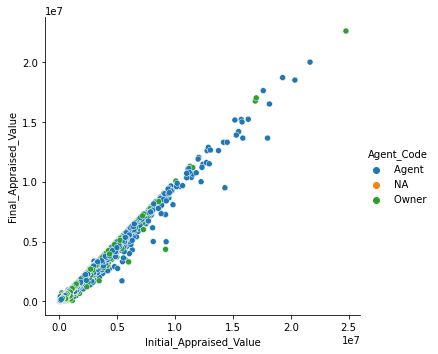

In [67]:
sns.relplot(data=real_data,kind='scatter',x='Initial_Appraised_Value',y='Final_Appraised_Value',hue='Agent_Code')
plt.show()

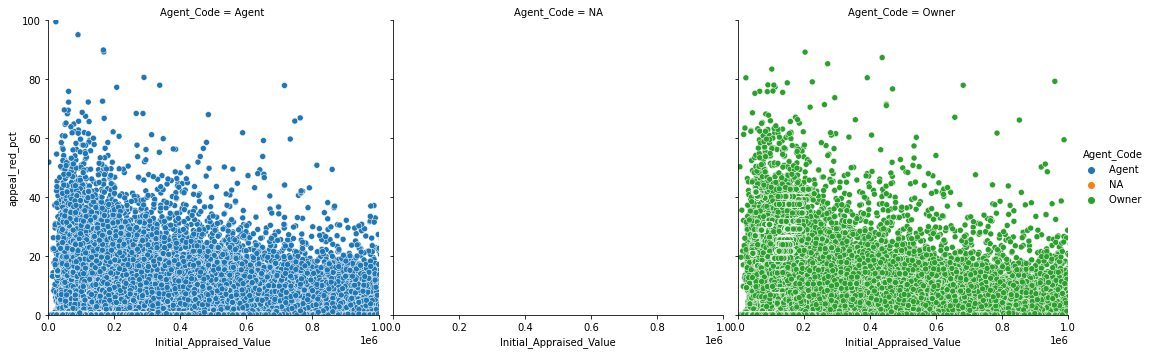

In [68]:
g = sns.relplot(data=real_data,kind='scatter',x='Initial_Appraised_Value',y='appeal_red_pct',col='Agent_Code',hue='Agent_Code')
g.set(xlim=[0,1000000],ylim=[0,100])
plt.show()

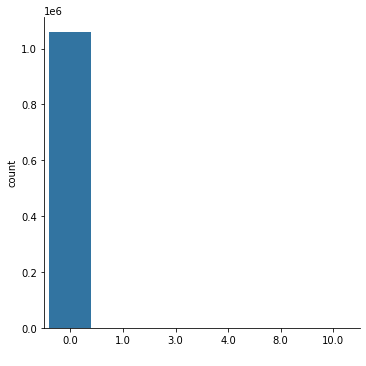

In [69]:
g = sns.catplot(data=real_data,x='    ',kind='count')
plt.show()

In [70]:
#This looks like it is almost exclusively 0
real_data['    '].value_counts()

0.0     1058789
1.0           3
3.0           2
10.0          1
8.0           1
4.0           1
Name:     , dtype: int64

This column is not only mostly zero values, but also has not column label (so I don't know what it is). It will be removed.

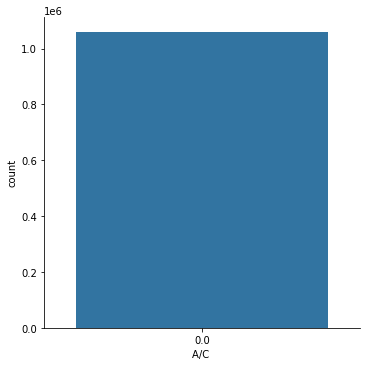

In [71]:
g = sns.catplot(data=real_data,x='A/C ',kind='count')
plt.show()

In [72]:
#This looks like it is almost exclusively 0, because it is...
real_data['A/C '].value_counts()

0.0    1058797
Name: A/C , dtype: int64

Since this column is all 0 for SFHs it will be removed

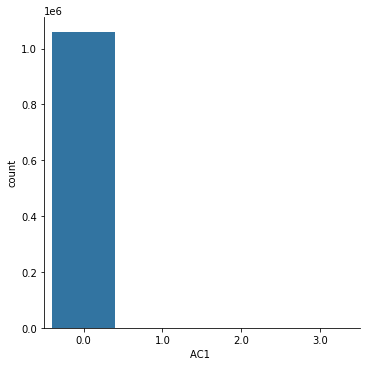

In [73]:
g = sns.catplot(data=real_data,x='AC1 ',kind='count')
plt.show()

In [74]:
#This looks like it is almost exclusively 0
real_data['AC1 '].value_counts()

0.0    1058794
1.0          1
3.0          1
2.0          1
Name: AC1 , dtype: int64

Since this column is all 0 for SFHs it will be removed

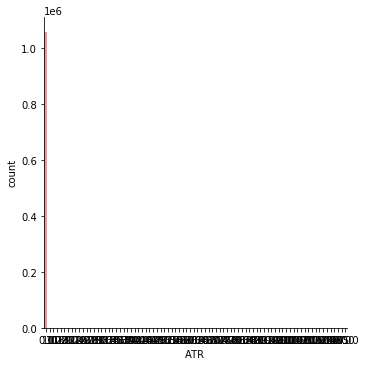

In [75]:
g = sns.catplot(data=real_data,x='ATR ',kind='count')
plt.show()

In [76]:
#This looks like it is almost exclusively 0, it's not but it is close
real_data['ATR '].value_counts()

0.0      1057334
40.0         241
36.0         136
32.0          87
48.0          74
          ...   
104.0          1
102.0          1
77.0           1
86.0           1
121.0          1
Name: ATR , Length: 82, dtype: int64

Although much of this column is 0 for SFHs there are enough non-zero values to initially keep, but it may not wind up being useful in modeling.

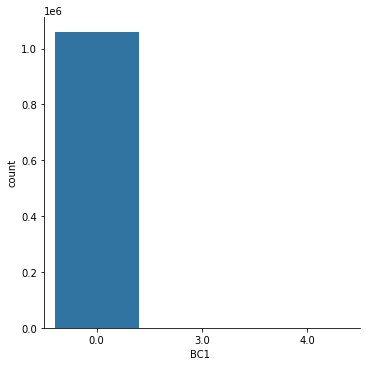

In [77]:
g = sns.catplot(data=real_data,x='BC1 ',kind='count')
plt.show()

In [78]:
#This looks like it is almost exclusively 0
real_data['BC1 '].value_counts()

0.0    1058793
3.0          3
4.0          1
Name: BC1 , dtype: int64

Since this column is almost all 0 for SFHs it will be removed

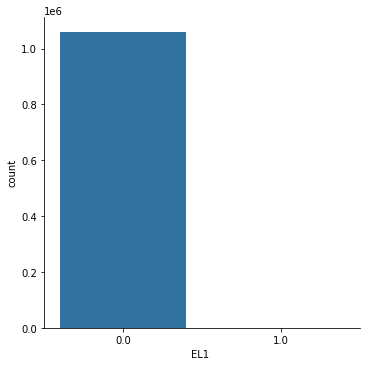

In [79]:
g = sns.catplot(data=real_data,x='EL1 ',kind='count')
plt.show()

In [80]:
#This looks like it is almost exclusively 0
real_data['EL1 '].value_counts()

0.0    1058796
1.0          1
Name: EL1 , dtype: int64

Since this column is almost all 0 for SFHs it will be removed

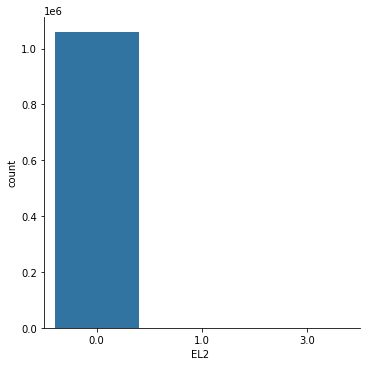

In [81]:
g = sns.catplot(data=real_data,x='EL2 ',kind='count')
plt.show()

In [82]:
#This looks like it is almost exclusively 0
real_data['EL2 '].value_counts()

0.0    1058793
3.0          3
1.0          1
Name: EL2 , dtype: int64

Since this column is almost all 0 for SFHs it will be removed

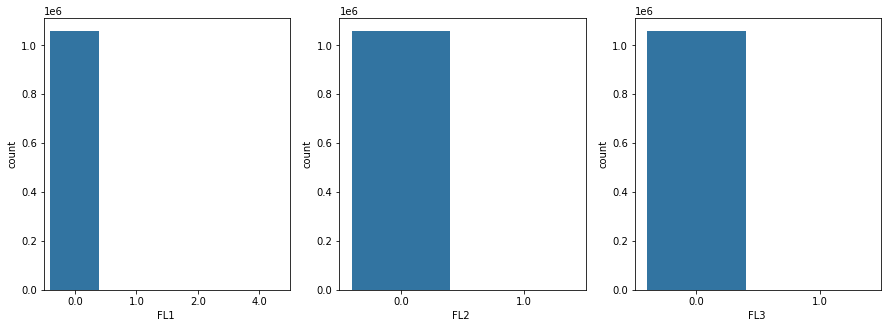

In [83]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='FL1 ')
g = sns.countplot(ax=axes[1],data=real_data,x='FL2 ')
g = sns.countplot(ax=axes[2],data=real_data,x='FL3 ')
plt.show()

In [84]:
#These looks like they are almost exclusively 0
print(real_data['FL1 '].value_counts())
print(real_data['FL2 '].value_counts())
print(real_data['FL3 '].value_counts())

0.0    1058736
1.0         56
2.0          4
4.0          1
Name: FL1 , dtype: int64
0.0    1058796
1.0          1
Name: FL2 , dtype: int64
0.0    1058796
1.0          1
Name: FL3 , dtype: int64


Since FL1, FL2, and FL3 are 3 catigories of open fireplaces. These are all almost exclusively 0 these columns will be removed.

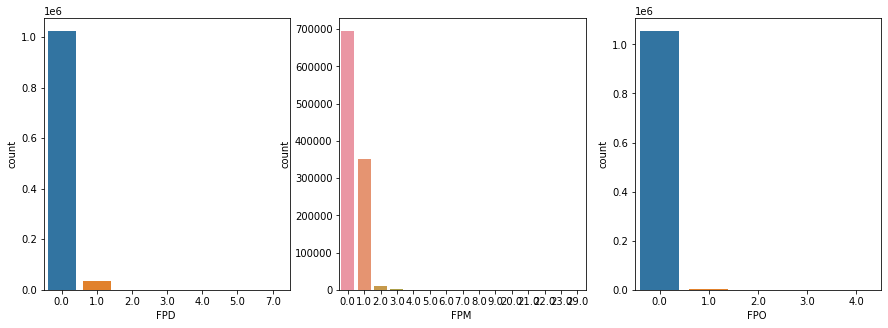

In [85]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='FPD ')
g = sns.countplot(ax=axes[1],data=real_data,x='FPM ')
g = sns.countplot(ax=axes[2],data=real_data,x='FPO ')
plt.show()

FPD = Fireplace: Direct Vent \
FPM = Fireplace: Metal Prefab \
FPO = Fireplace: Adl Open \
While there are a considerable amount of zero values there is enough data worth keeping. It may be worth considering a combined fireplace calculation?

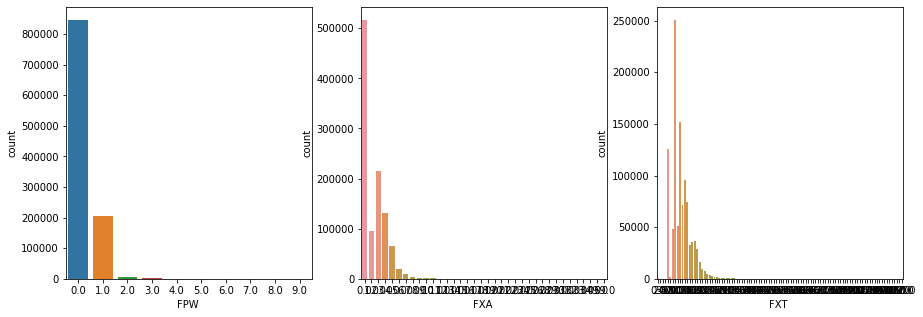

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='FPW ')
g = sns.countplot(ax=axes[1],data=real_data,x='FXA ')
g = sns.countplot(ax=axes[2],data=real_data,x='FXT ')
plt.show()

FPW = Fireplace: Masonry Firebrick \
FXA = Fixtures: Addl \
FXT = Fixtures: Total \
All of these are worth continueing in analysis. FPW may be worth combining with the above Fireplace columns. FXA and FXT may be summations of the number of fixtures (the table these codes are coming from) and may or may not be useful in analysis.

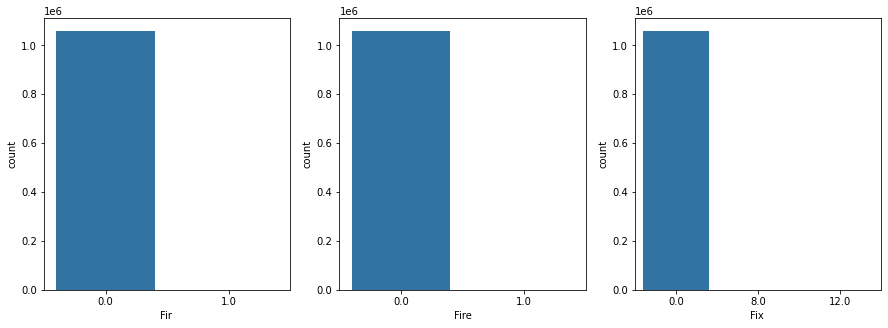

In [87]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='Fir ')
g = sns.countplot(ax=axes[1],data=real_data,x='Fire')
g = sns.countplot(ax=axes[2],data=real_data,x='Fix ')
plt.show()

In [88]:
#These looks like they are almost exclusively 0
print(real_data['Fir '].value_counts())
print(real_data['Fire'].value_counts())
print(real_data['Fix '].value_counts())

0.0    1058795
1.0          2
Name: Fir , dtype: int64
0.0    1058796
1.0          1
Name: Fire, dtype: int64
0.0     1058795
12.0          1
8.0           1
Name: Fix , dtype: int64


Fir, Fire, and Fix seem to be columns that are dominated by zero values and will be removed.

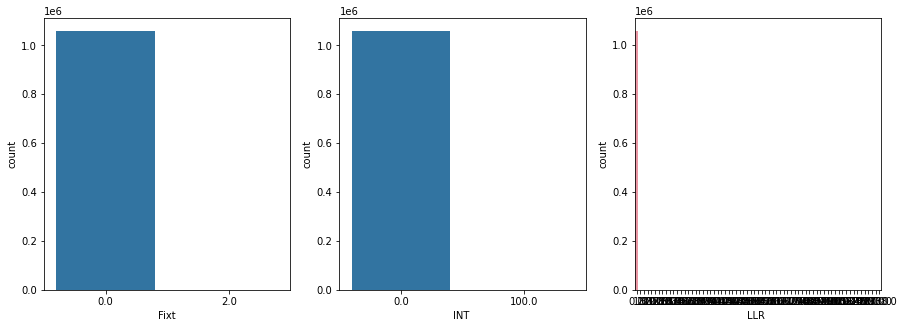

In [89]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='Fixt')
g = sns.countplot(ax=axes[1],data=real_data,x='INT ')
g = sns.countplot(ax=axes[2],data=real_data,x='LLR ')
plt.show()

In [90]:
#These looks like they are almost exclusively 0
print(real_data['Fixt'].value_counts())
print(real_data['INT '].value_counts())

0.0    1058796
2.0          1
Name: Fixt, dtype: int64
0.0      1058790
100.0          7
Name: INT , dtype: int64


Fixt and INT are almost all zeros. 
LLR indicates that the property has a lower level recreation space.

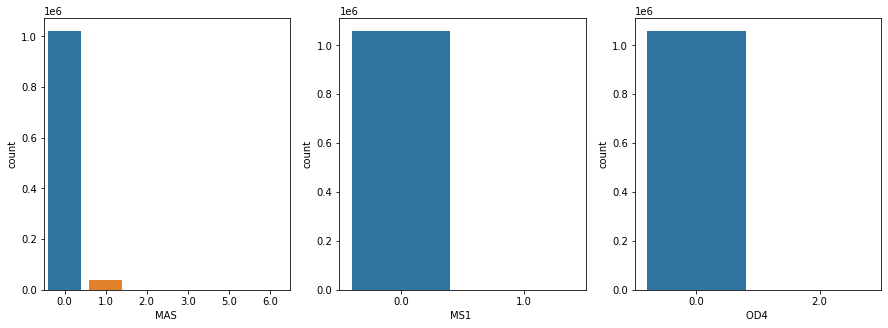

In [91]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='MAS ')
g = sns.countplot(ax=axes[1],data=real_data,x='MS1 ')
g = sns.countplot(ax=axes[2],data=real_data,x='OD4 ')
plt.show()

In [92]:
#These looks like they are almost exclusively 0
print(real_data['MS1 '].value_counts())
print(real_data['OD4 '].value_counts())

0.0    1058796
1.0          1
Name: MS1 , dtype: int64
0.0    1058795
2.0          2
Name: OD4 , dtype: int64


MAS = Masonry Trim - effects the look of the property. \
MS1 = Miscellaneous - almost entirely zero and will be removed. \
OD4 = OH Door: Motor RS - also almost entirely zero and will be removed. 

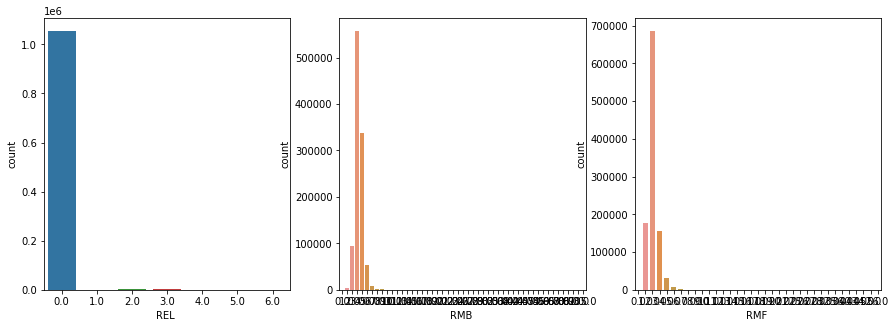

In [93]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='REL ')
g = sns.countplot(ax=axes[1],data=real_data,x='RMB ')
g = sns.countplot(ax=axes[2],data=real_data,x='RMF ')
plt.show()

In [94]:
#Is REL exclusively 0
print(real_data['REL '].value_counts())

0.0    1054655
2.0       1873
3.0       1508
4.0        706
5.0         52
1.0          2
6.0          1
Name: REL , dtype: int64


REL = Elivator stops - uncommon in SFHs \
RMB = Room: Bedroom - commonly used as a home descriptor. Likely linked to value. \
RMF = Room: Full Bath - commonly used as a home dexcriptor. Likely linked to value.

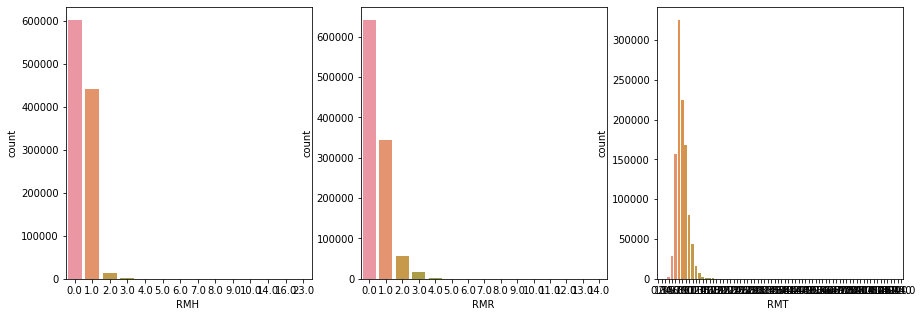

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='RMH ')
g = sns.countplot(ax=axes[1],data=real_data,x='RMR ')
g = sns.countplot(ax=axes[2],data=real_data,x='RMT ')
plt.show()

RMH = Room: Half Bath - commonly used as a home dexcriptor. Likely linked to value. \
RMR = Room: Rec - number of recreational rooms in a building. \
RMT = Room: Total - number of total rooms

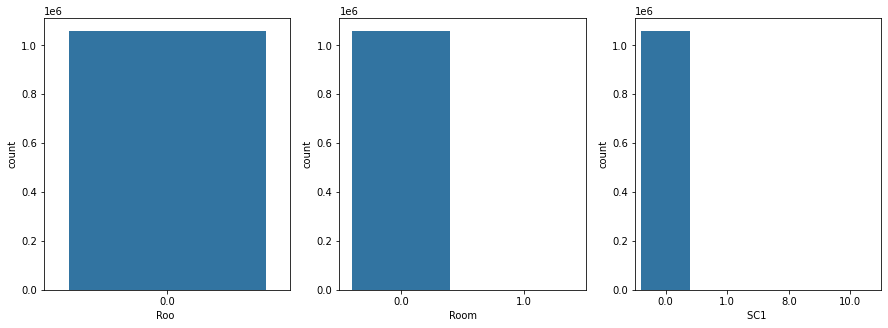

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='Roo ')
g = sns.countplot(ax=axes[1],data=real_data,x='Room')
g = sns.countplot(ax=axes[2],data=real_data,x='SC1 ')
plt.show()

In [97]:
#These looks like they are almost exclusively 0
print(real_data['Room'].value_counts())
print(real_data['SC1 '].value_counts())

0.0    1058796
1.0          1
Name: Room, dtype: int64
0.0     1058793
1.0           2
10.0          1
8.0           1
Name: SC1 , dtype: int64


Roo and Room were are both zero (or nearly). \
SC1 = Pool: Indoor Value - only 4 have a value. \
All three of these will be removed

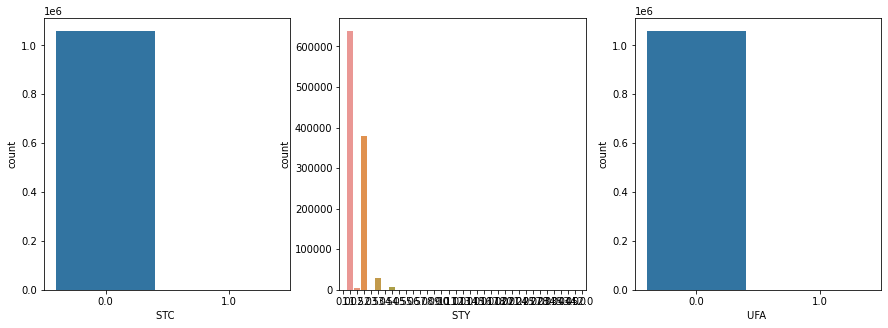

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='STC ')
g = sns.countplot(ax=axes[1],data=real_data,x='STY ')
g = sns.countplot(ax=axes[2],data=real_data,x='UFA ')
plt.show()

In [99]:
#These looks like they are almost exclusively 0
print(real_data['STC '].value_counts())
print(real_data['UFA '].value_counts())

0.0    1058795
1.0          2
Name: STC , dtype: int64
0.0    1058796
1.0          1
Name: UFA , dtype: int64


STC = # Stories - in this case almost all of them are 0. \
STY = Story Height Index - It looks like this is dominated by 4 values. \
UFA = Unfinished area - only 1 property has a value. 

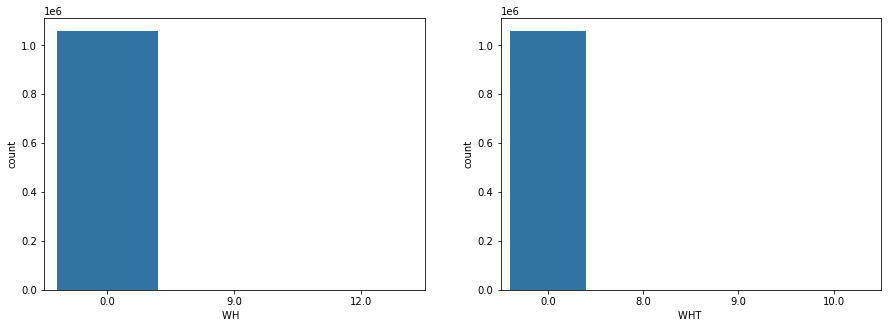

In [100]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
g = sns.countplot(ax=axes[0],data=real_data,x='WH  ')
g = sns.countplot(ax=axes[1],data=real_data,x='WHT ')
plt.show()

In [101]:
#These looks like they are almost exclusively 0
print(real_data['WH  '].value_counts())
print(real_data['WHT '].value_counts())

0.0     1058795
12.0          1
9.0           1
Name: WH  , dtype: int64
0.0     1058791
8.0           3
9.0           2
10.0          1
Name: WHT , dtype: int64


WH and WHT are both wall height only 8 values between the two columns and so these will be removed.

In [102]:
print(col)

Index(['Unnamed: 0', 'acct', 'state_class', 'school_dist', 'Neighborhood_Code',
       'Neighborhood_Grp', 'Market_Area_1', 'Market_Area_2', 'econ_area',
       'econ_bld_class', 'center_code', 'yr_impr', 'yr_annexed', 'dsc_cd',
       'bld_ar', 'land_ar', 'acreage', 'Cap_acct', 'shared_cad', 'land_val',
       'bld_val', 'x_features_val', 'assessed_val', 'tot_appr_val',
       'tot_mkt_val', 'prior_land_val', 'prior_bld_val',
       'prior_x_features_val', 'prior_ag_val', 'prior_tot_appr_val',
       'prior_tot_mkt_val', 'new_construction_val', 'tot_rcn_val',
       'value_status', 'protested', 'lgl_1', 'lgl_2', 'lgl_3', 'lgl_4', 'jurs',
       'Real_Personal_Property', 'Hearing_Type', 'State_Class_Code',
       'Owner_Name', 'Agent_Code', 'Initial_Appraised_Value',
       'Initial_Market_Value', 'Final_Appraised_Value', 'Final_Market_Value',
       'appeal_reduction', 'appeal_red_pct', '    ', 'A/C ', 'AC1 ', 'ATR ',
       'BC1 ', 'EL1 ', 'EL2 ', 'FL1 ', 'FL2 ', 'FL3 ', 'FPD ', 'FPM

In [103]:
#columns that did not seem to have variation over this data set. May make sense to drop acreage also since it is a duplicate of land_ar.
col_to_exclude = ['state_class','econ_area','econ_bld_class','yr_annexed','dsc_cd','prior_ag_val','acreage','value_status','lgl_1', 'lgl_2', 'lgl_3', 'lgl_4','State_Class_Code','Owner_Name','    ','A/C ','AC1 ','BC1 ','EL1 ','EL2 ','FL1 ','FL2 ','FL3 ','Fir ','Fire','Fix ','Fixt','INT ','MS1 ','OD4 ','Roo ','Room','SC1 ','UFA ','STC ','WH  ','WHT ']

In [104]:
#create a decreased data set with the columns without much data removed
real_data2 = real_data.drop(col_to_exclude,axis=1)

In [105]:
real_data2.shape

(1059015, 53)

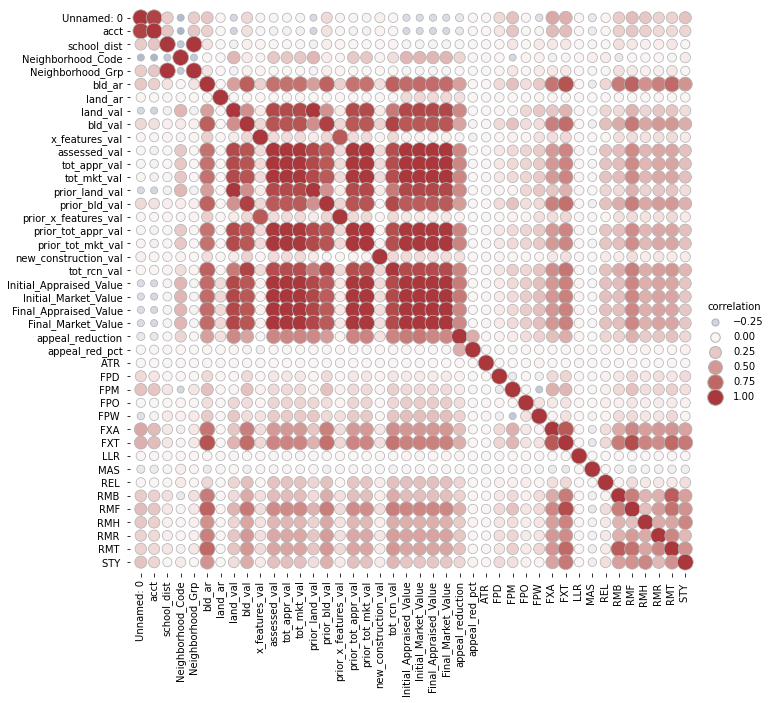

In [106]:
#based on heat map code from seaborn gallery. https://seaborn.pydata.org/examples/heat_scatter.html

# Compute a correlation matrix and convert to long-form
corr_mat = real_data2.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

The value columns all look to be well corrolated to each other. Higher fixture numbers and more bathrooms look to be positively corrolated to values.

In [107]:
col2 = real_data2.columns

In [108]:
print(col2)

Index(['Unnamed: 0', 'acct', 'school_dist', 'Neighborhood_Code',
       'Neighborhood_Grp', 'Market_Area_1', 'Market_Area_2', 'center_code',
       'yr_impr', 'bld_ar', 'land_ar', 'Cap_acct', 'shared_cad', 'land_val',
       'bld_val', 'x_features_val', 'assessed_val', 'tot_appr_val',
       'tot_mkt_val', 'prior_land_val', 'prior_bld_val',
       'prior_x_features_val', 'prior_tot_appr_val', 'prior_tot_mkt_val',
       'new_construction_val', 'tot_rcn_val', 'protested', 'jurs',
       'Real_Personal_Property', 'Hearing_Type', 'Agent_Code',
       'Initial_Appraised_Value', 'Initial_Market_Value',
       'Final_Appraised_Value', 'Final_Market_Value', 'appeal_reduction',
       'appeal_red_pct', 'ATR ', 'FPD ', 'FPM ', 'FPO ', 'FPW ', 'FXA ',
       'FXT ', 'LLR ', 'MAS ', 'REL ', 'RMB ', 'RMF ', 'RMH ', 'RMR ', 'RMT ',
       'STY '],
      dtype='object')


In [109]:
correl_df = real_data2.corr()



In [110]:
correl_df.drop(axis=1,columns=['Unnamed: 0', 'acct'],inplace=True)
correl_df.drop(axis=0,index=['Unnamed: 0', 'acct'],inplace=True)

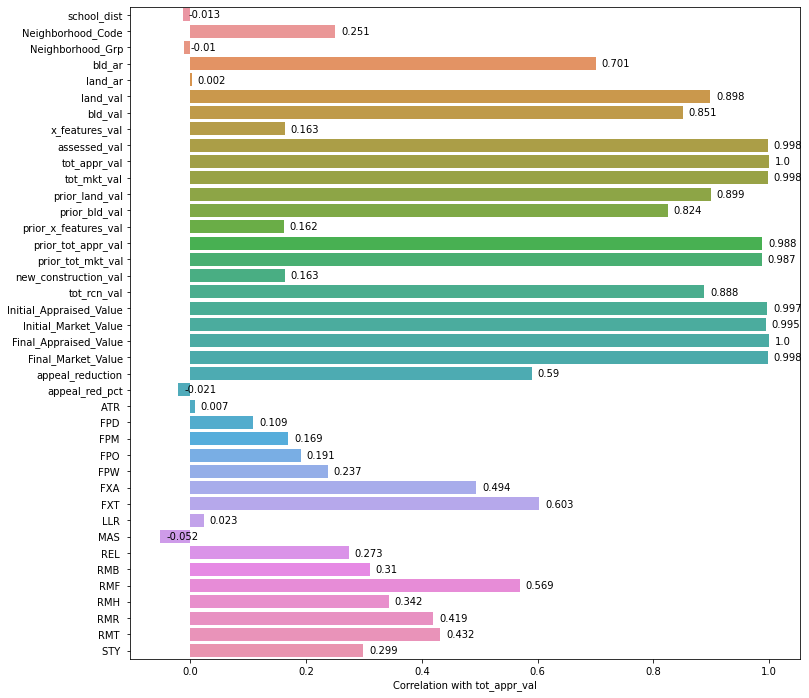

In [111]:
f, ax = plt.subplots(figsize=(12, 12))
#correl_df.sort_values(by='tot_appr_val',inplace=True,axis=0)
g = sns.barplot(x=correl_df['tot_appr_val'],y=correl_df.columns)
#label these bars with the corr value based on https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 cor = p.get_width() # width (the corrolation co-eff)
 # adding text to each bar
 ax.text(x = cor+0.01, # x-coordinate position of data label, padded 0.01 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = round(cor,3), # data label
 va = 'center') # sets vertical alignment (va) to center
g = plt.xlabel('Correlation with tot_appr_val')
plt.show()

It looks as though Final_Appraised_Value, Final_Market_Value, assessed_val, tot_mkt_val may all be the same value?
bld_ar, FXT, and RMF seem to be strongly correlated to tot_appr_val. These along with several other property descripters will be interesting to use in modeling appraised value. 
Interestingly, although land_val (land value) is highly correlated, land_ar (land area) is not at all correlated. This may mean that large lots have a tendency to not be worth much. See plot of these two below.

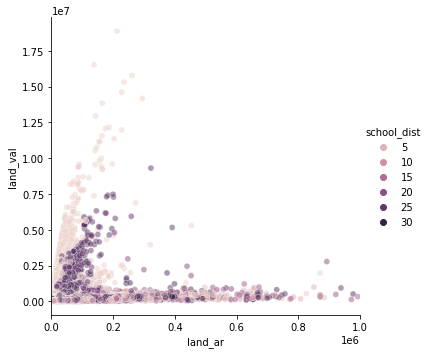

In [112]:
g = sns.relplot(data=real_data2,kind='scatter',x='land_ar',y='land_val',alpha=0.5,hue='school_dist')
g = plt.xlim(left=0,right=1000000)
plt.show()

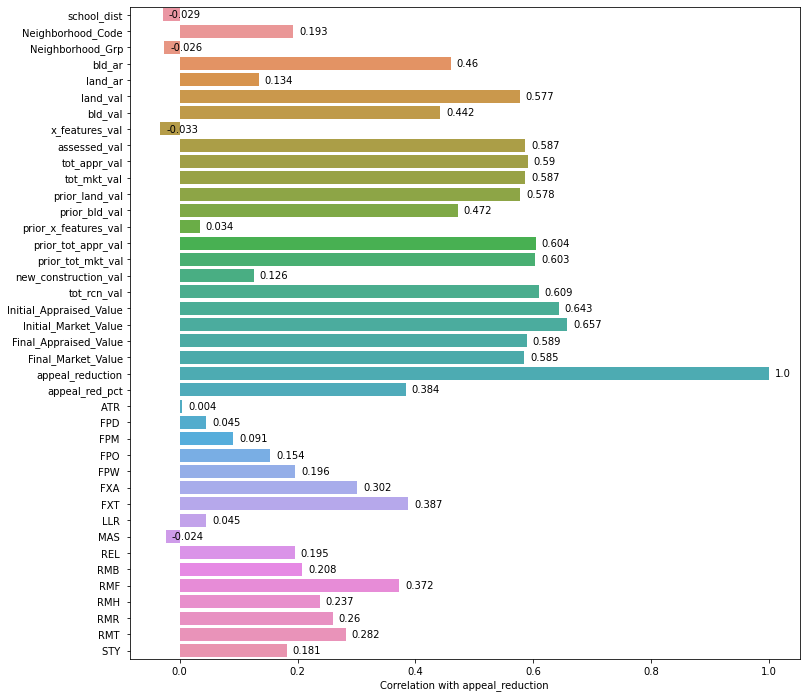

In [113]:
f, ax = plt.subplots(figsize=(12, 12))
#correl_df.sort_values(by='appeal_reduction',inplace=True,axis=0)
g = sns.barplot(x=correl_df['appeal_reduction'],y=correl_df.columns)
#label these bars with the corr value based on https://medium.com/swlh/quick-guide-to-labelling-data-for-common-seaborn-plots-736e10bf14a9
for p in ax.patches:
 height = p.get_height() # height of each horizontal bar is the same
 cor = p.get_width() # width (the corrolation co-eff)
 # adding text to each bar
 ax.text(x = cor+0.01, # x-coordinate position of data label, padded 0.01 to right of bar
 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
 s = round(cor,3), # data label
 va = 'center') # sets vertical alignment (va) to center
g = plt.xlabel('Correlation with appeal_reduction')
plt.show()

In [114]:
#write the final file to the data folder
real_data2.to_csv('gdrive/My Drive/Springboard Capstone 2/HCAD_Data/sfh_data2model.csv')